In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from math import pi
import IPython.display

# Problem 1

### Part(a)

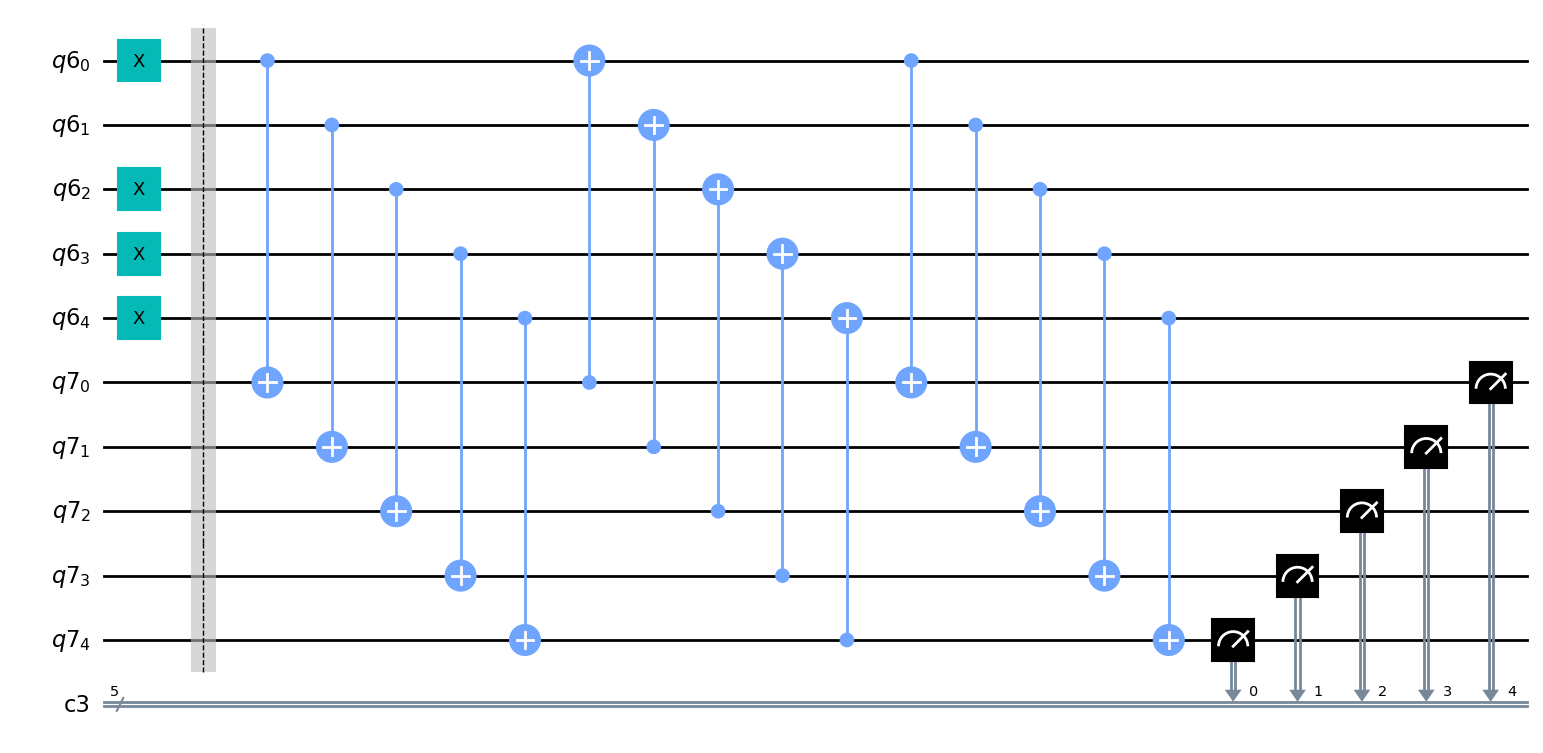

In [6]:
b1 = QuantumRegister(5)
b2 = QuantumRegister(5)
c1 = ClassicalRegister(5)

n1 = '10111'
n2 = '00000'

qc = QuantumCircuit(b1,b2,c1)
for i in range(5):
    if n1[i] == '1':
        qc.x(i)
    if n2[i] == '1':
        qc.x(i+5)
qc.barrier()
for i in range(5):
    qc.cx(i,i+5)
    qc.cx(i+5,i)
    qc.cx(i,i+5)
    

for i in range(5):
    qc.measure(9-i,i)
qc.draw('mpl')

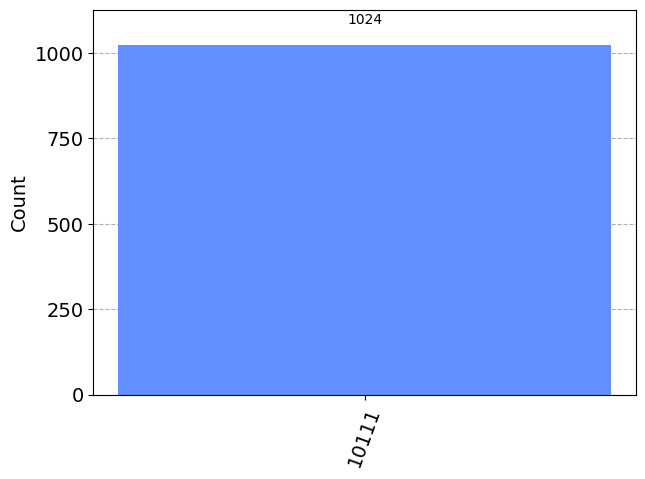

In [8]:
sim = Aer.get_backend('aer_simulator') 
results = sim.run(qc).result().get_counts()
plot_histogram(results)

### Part(b)

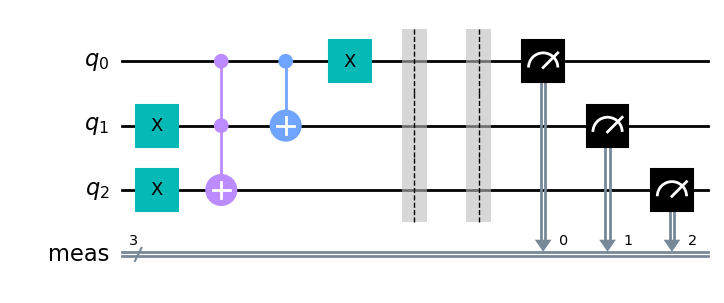

In [27]:
qc = QuantumCircuit(3)
m = '110'
for i in range(3):
    if m[2-i] == '1':
        qc.x(i)

qc.ccx(0,1,2)
qc.cx(0,1)
qc.x(0)
qc.barrier()
qc.measure_all()
qc.draw('mpl')

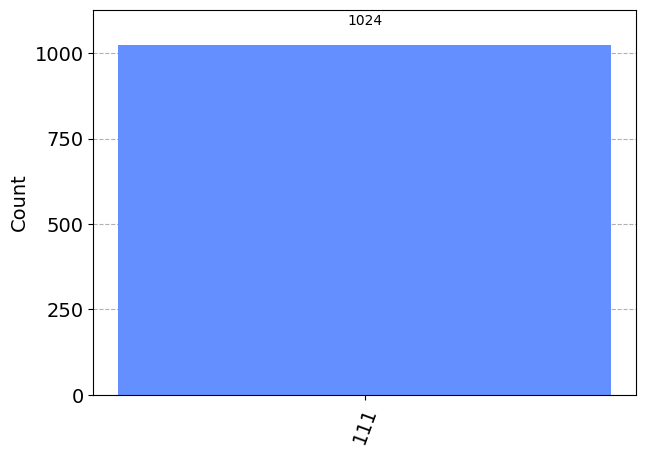

In [28]:
sim = Aer.get_backend('aer_simulator') 
results = sim.run(qc).result().get_counts()
plot_histogram(results)

### Part(c)

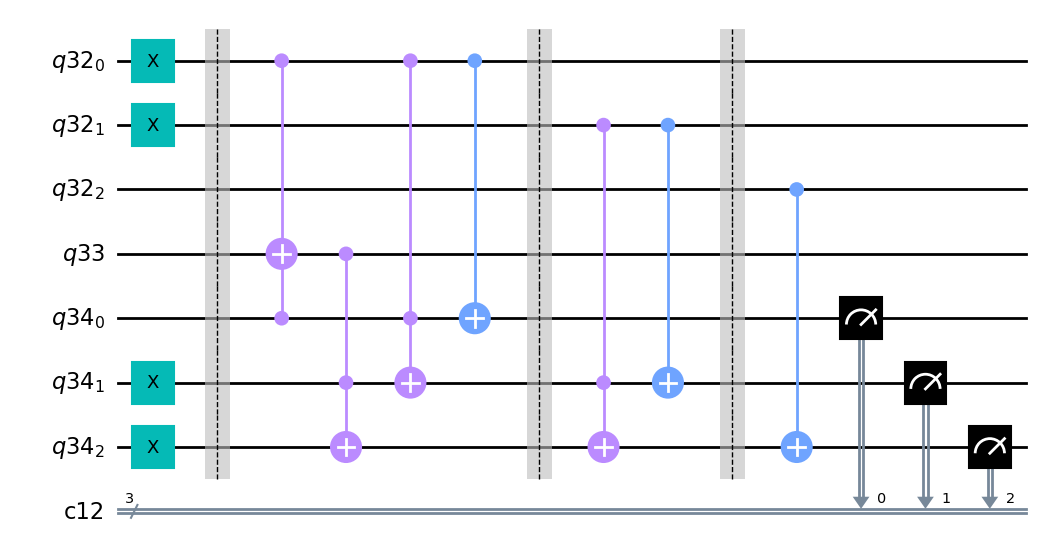

In [39]:
b1 = QuantumRegister(3)
a = QuantumRegister(1)
b2 = QuantumRegister(3)
c1 = ClassicalRegister(3)

n1 = '011'
n2 = '110'

qc = QuantumCircuit(b1,a,b2,c1)
for i in range(3):
    if n1[i] == '1':
        qc.x(2-i)
    if n2[i] == '1':
        qc.x(6-i)

qc.barrier()

qc.ccx(0,4,3)
qc.ccx(3,5,6)
qc.ccx(0,4,5)
qc.cx(0,4)
qc.barrier()
qc.ccx(1,5,6)
qc.cx(1,5)
qc.barrier()
qc.cx(2,6)

for i in range(3):
    qc.measure(4+i,i)

qc.draw('mpl')



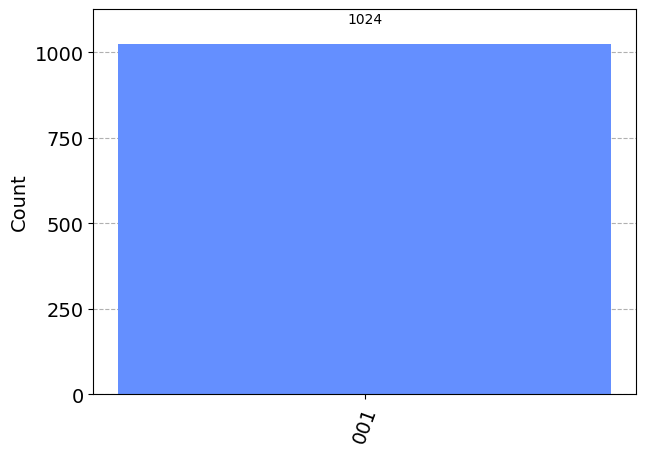

In [40]:
sim = Aer.get_backend('aer_simulator') 
results = sim.run(qc).result().get_counts()
plot_histogram(results)

### Part(d) Hamming Weight

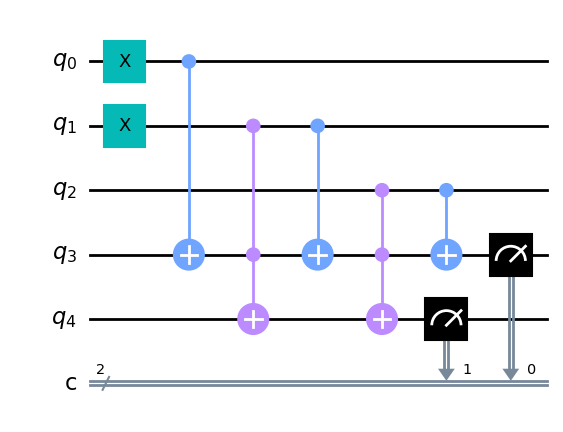

In [46]:
qc = QuantumCircuit(5,2)
n = '011'
for i in range(3):
    if n[i] == '1':
        qc.x(2-i)

qc.cx(0,3)
qc.ccx(1,3,4)
qc.cx(1,3)
qc.ccx(2,3,4)
qc.cx(2,3)

qc.measure(3,0)
qc.measure(4,1)
qc.draw('mpl')


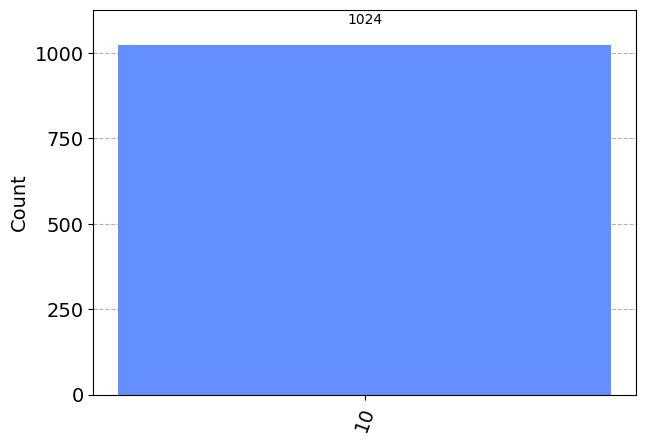

In [47]:
sim = Aer.get_backend('aer_simulator') 
results = sim.run(qc).result().get_counts()
plot_histogram(results)